<a href="https://colab.research.google.com/github/MDRobiulhassan/Spam-Email-Detection/blob/main/SpamEmailDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIL Project Colab/Final Project 2/spam_dataset.csv')

In [10]:
df.head()

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10019 non-null  object
 1   text    10019 non-null  object
dtypes: object(2)
memory usage: 156.7+ KB


In [12]:
df

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
...,...,...
10014,ham,this would be a great tragedy for all concerne...
10015,ham,"hello , welcome to medzonline filamentous shop..."
10016,ham,this is amazing stuff add some inches fast saf...
10017,spam,author jra date escapenumber escapenumber esca...


# Data Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['label'] = encoder.fit_transform(df['label'])

In [15]:
#null
df.isnull().sum()

,0
label,0
text,0


In [16]:
df=df.dropna()

In [17]:
#Duplicate
df.duplicated().sum()

0

In [18]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [19]:
df.shape

(10019, 2)

In [20]:
df['label'].value_counts()

,count
label,
0,5309
1,4710


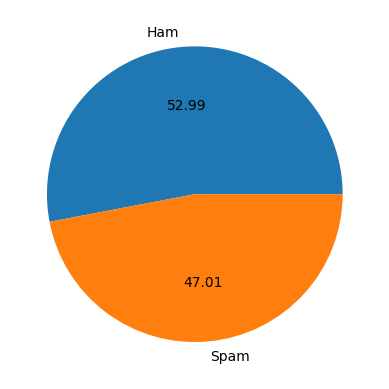

In [21]:
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [22]:
df['length']=df['text'].apply(len)

In [23]:
df.head()

,label,text,length
0,0,into the kingdom of god and those that are ent...,1054
1,1,there was flow at hpl meter 1505 on april firs...,235
2,0,take a look at this one campaign for bvyhprice...,218
3,1,somu wrote actually thats what i was looking f...,847
4,1,fathi boudra wrote i fixed the issue in the sv...,549


In [24]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,label,text,length,word_count
0,0,into the kingdom of god and those that are ent...,1054,183
1,1,there was flow at hpl meter 1505 on april firs...,235,56
2,0,take a look at this one campaign for bvyhprice...,218,30
3,1,somu wrote actually thats what i was looking f...,847,166
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84


In [27]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head(100)

,label,text,length,word_count,sentence_count
0,0,into the kingdom of god and those that are ent...,1054,183,1
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9
2,0,take a look at this one campaign for bvyhprice...,218,30,1
3,1,somu wrote actually thats what i was looking f...,847,166,1
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1
...,...,...,...,...,...
95,0,"sun , 19 dec 2004 22 : 45 : 30 - 0600\nbefore ...",2342,457,28
96,0,lady stalking grimly away on the arm of a rosy...,3160,556,1
97,1,andrew i'm very happy with the progress i've m...,380,77,1
98,1,"hi norma ,\nsevil ' s primary project has been...",448,83,5


In [29]:
df[['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,10019.000000,10019.000000,10019.000000
mean,1617.501547,276.499950,7.005889
std,3325.512698,582.185421,26.328333
min,4.000000,1.000000,1.000000
25%,438.000000,78.000000,1.000000
50%,856.000000,150.000000,1.000000
75%,1862.000000,311.000000,5.000000
max,141261.000000,24945.000000,988.000000


In [30]:
df[df['label']==0][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,5309.000000,5309.000000,5309.000000
mean,1277.250706,215.120362,6.504992
std,2684.766017,470.955349,20.729759
min,4.000000,1.000000,1.000000
25%,349.000000,59.000000,1.000000
50%,676.000000,117.000000,1.000000
75%,1477.000000,245.000000,4.000000
max,141261.000000,24945.000000,502.000000


In [31]:
df[df['label']==1][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,4710.000000,4710.000000,4710.000000
mean,2001.024204,345.685563,7.570488
std,3889.045499,679.719293,31.459460
min,4.000000,1.000000,1.000000
25%,573.000000,107.000000,1.000000
50%,1110.000000,196.500000,1.000000
75%,2158.000000,377.750000,6.000000
max,85490.000000,16876.000000,988.000000


In [32]:
import seaborn as sns

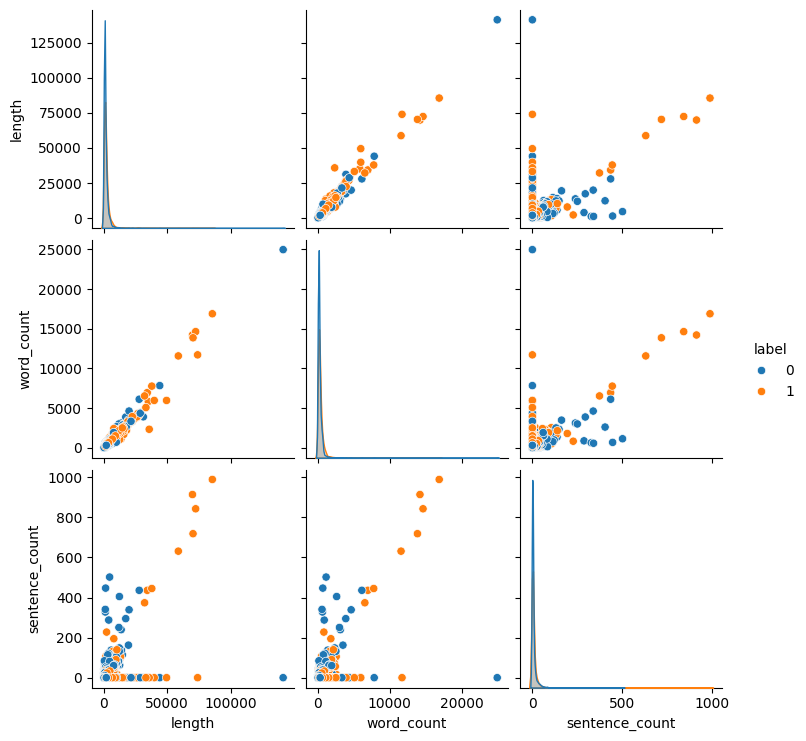

In [33]:
sns.pairplot(df,hue='label')

<Axes: >

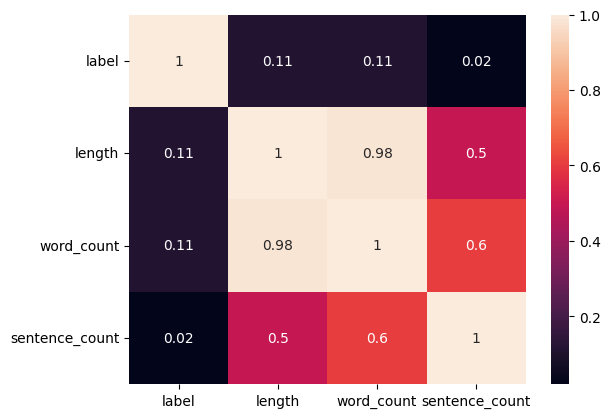

In [34]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [36]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

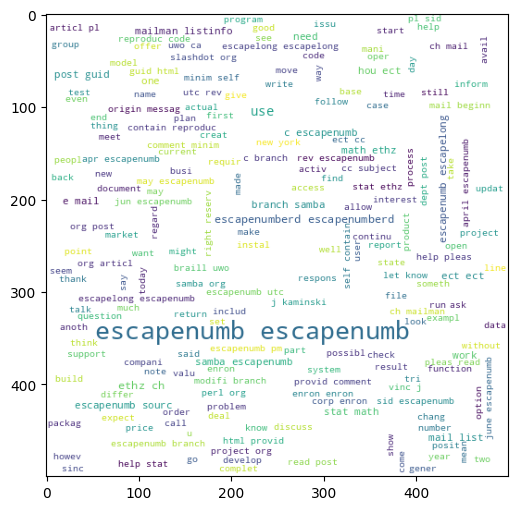

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

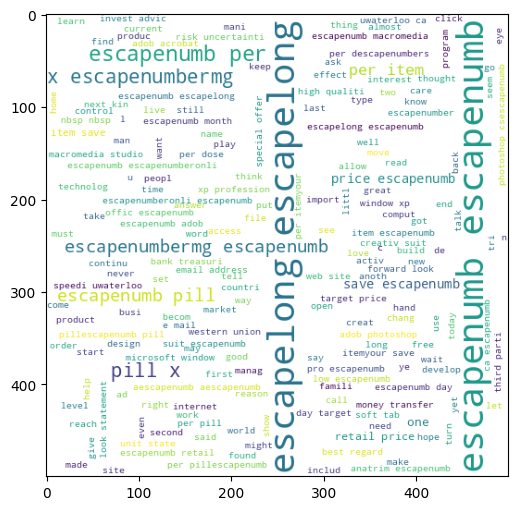

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [47]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)


1010188

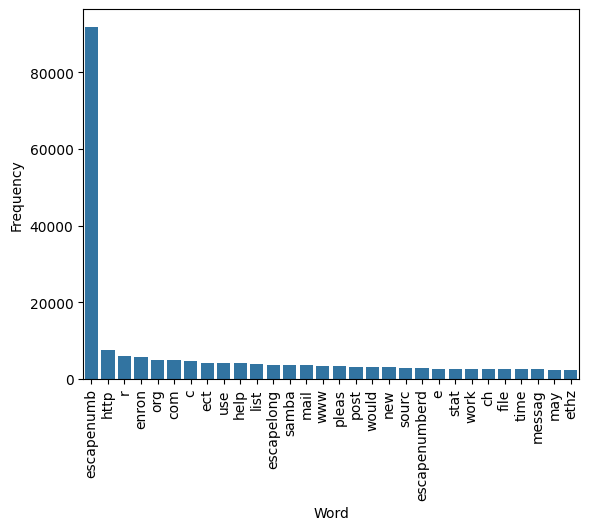

In [49]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [50]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

677831

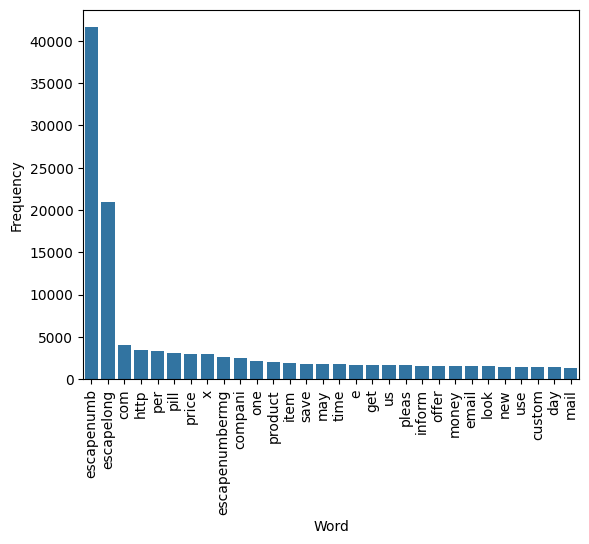

In [52]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [53]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [54]:
df['processed_length'] = df['transformed_text'].apply(len)

In [55]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...,440


In [56]:
first_row = df.iloc[0]
print("Original Text:\n", first_row['text'])
print("\nTransformed Text:\n", first_row['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [57]:
import re

def remove_escape_words(text):
    return re.sub(r'\bescape\w*\b', '', text)

first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])

<ipython-input-57-f30d36c2c815>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])


In [58]:
first_row_copy = first_row.copy()

first_row_copy['transformed_text'] = remove_escape_words(first_row_copy['transformed_text'])

print("Original Text:\n", first_row['text'])
print("\nUpdated Transformed Text:\n", first_row_copy['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [59]:
df['transformed_text'] = df['transformed_text'].apply(remove_escape_words)

In [60]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray t...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target ...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev fix ...,440


In [61]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [62]:
import re

def clean_transformed_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[a-zA-Z0-9.-]+\.(com|org|net|edu|gov|co|uk|in)\b', '', text, flags=re.MULTILINE)

    text = re.sub(r'\bhttp\b|\bhttps\b|\bwww\b', '', text, flags=re.MULTILINE)

    text = re.sub(r"[^a-zA-Z\s]", "", text).strip().lower()

    words = text.split()

    seen = set()
    words = [word for word in words if not (word in seen or seen.add(word))]

    words = [word for word in words if len(word) > 1 or word in ["i", "a"]]

    return " ".join(words)

In [63]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: clean_transformed_text(str(x)))

In [64]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

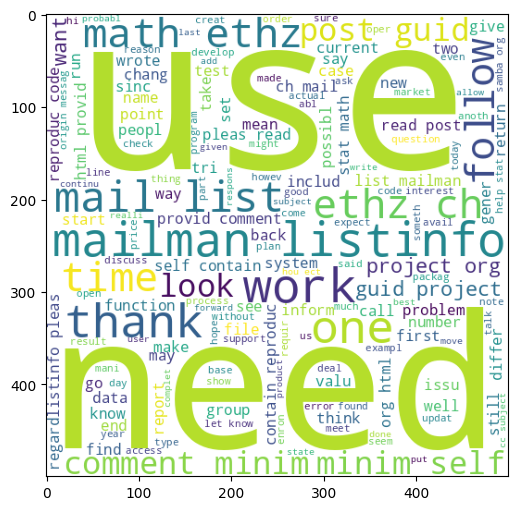

In [65]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [66]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

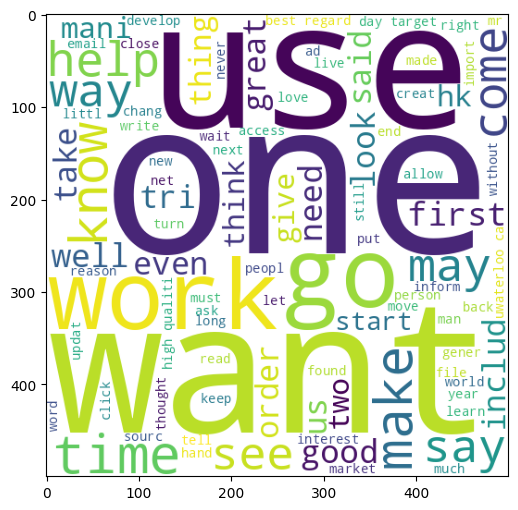

In [67]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [68]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
len(spam_corpus)

448471

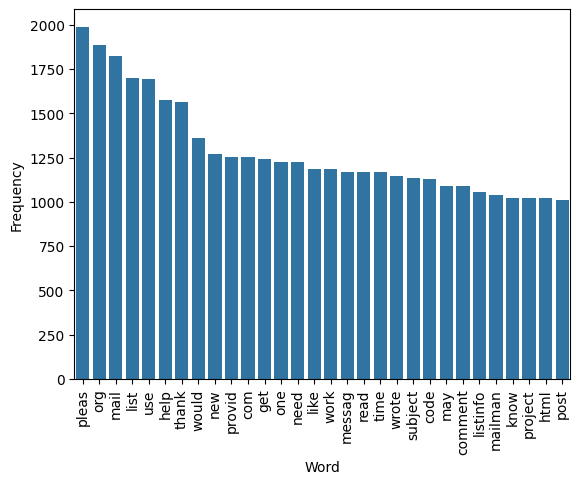

In [70]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [72]:
len(ham_corpus)

401260

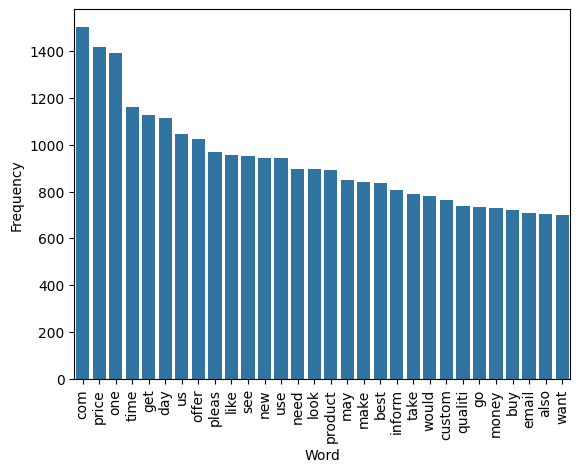

In [73]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
df['processed_length'] = df['transformed_text'].apply(len)

In [75]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray th...,391
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter april first deal ticket cover p...,82
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target pri...,109
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look user enter string ...,349
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev dir c...,308


# Intial Model Development

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [77]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [78]:
X.shape

(10019, 3000)

In [79]:
y = df['label'].values


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score

In [83]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [84]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9231536926147704
[[938 116]
 [ 38 912]]
0.8871595330739299


In [85]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9446107784431138
[[990  64]
 [ 47 903]]
0.9338159255429163


In [86]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8812375249500998
[[974  80]
 [158 792]]
0.908256880733945


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [88]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [89]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    #'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [90]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)

    return accuracy, precision, recall, f2

In [91]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9660678642714571, 0.973175965665236, 0.9547368421052631, 0.9583685545224007)

In [92]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f2_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f2 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print(f"For {name}:")
    print(f"Accuracy  - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Recall    - {current_recall}")
    print(f"F2 Score  - {current_f2}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f2_scores.append(current_f2)

For SVC:
Accuracy  - 0.9660678642714571
Precision - 0.973175965665236
Recall    - 0.9547368421052631
F2 Score  - 0.9583685545224007

For KN:
Accuracy  - 0.6297405189620758
Precision - 1.0
Recall    - 0.21894736842105264
F2 Score  - 0.25948103792415167

For NB:
Accuracy  - 0.9446107784431138
Precision - 0.9338159255429163
Recall    - 0.9505263157894737
F2 Score  - 0.947136563876652

For DT:
Accuracy  - 0.8383233532934131
Precision - 0.9335180055401662
Recall    - 0.7094736842105264
F2 Score  - 0.7452454666076958

For LR:
Accuracy  - 0.9545908183632734
Precision - 0.9663409337676439
Recall    - 0.9368421052631579
F2 Score  - 0.9425969074348655

For RF:
Accuracy  - 0.9620758483033932
Precision - 0.9648936170212766
Recall    - 0.9547368421052631
F2 Score  - 0.9567510548523207

For AdaBoost:
Accuracy  - 0.8562874251497006
Precision - 0.9436997319034852
Recall    - 0.7410526315789474
F2 Score  - 0.774307083150022

For ETC:
Accuracy  - 0.966566866267465
Precision - 0.9613375130616509
Recall  

In [93]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F2 Score': f2_scores
}).sort_values('Recall', ascending=False)

In [94]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F2 Score
7,ETC,0.966567,0.961338,0.968421,0.966996
0,SVC,0.966068,0.973176,0.954737,0.958369
5,RF,0.962076,0.964894,0.954737,0.956751
2,NB,0.944611,0.933816,0.950526,0.947137
4,LR,0.954591,0.966341,0.936842,0.942597
9,xgb,0.950599,0.967069,0.927368,0.935046
8,GBDT,0.907685,0.964763,0.835789,0.858750
6,AdaBoost,0.856287,0.943700,0.741053,0.774307
3,DT,0.838323,0.933518,0.709474,0.745245
1,KN,0.629741,1.000000,0.218947,0.259481


In [95]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [96]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.966567
1,SVC,Accuracy,0.966068
2,RF,Accuracy,0.962076
3,NB,Accuracy,0.944611
4,LR,Accuracy,0.954591
5,xgb,Accuracy,0.950599
6,GBDT,Accuracy,0.907685
7,AdaBoost,Accuracy,0.856287
8,DT,Accuracy,0.838323
9,KN,Accuracy,0.629741


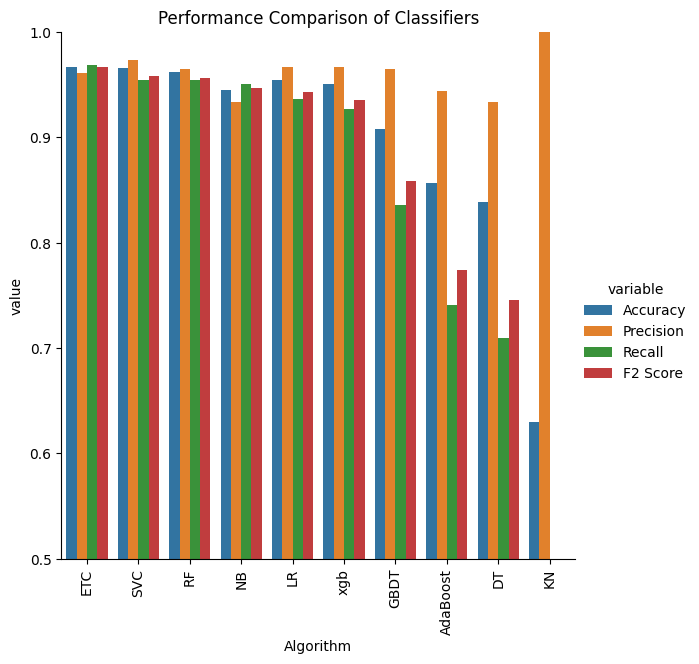

In [97]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Performance Comparison of Classifiers")
plt.show()

In [98]:
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    print("\n")

Confusion Matrix for SVC:
 [[1029   25]
 [  43  907]]


Confusion Matrix for KN:
 [[1054    0]
 [ 742  208]]


Confusion Matrix for NB:
 [[990  64]
 [ 47 903]]


Confusion Matrix for DT:
 [[1006   48]
 [ 276  674]]


Confusion Matrix for LR:
 [[1023   31]
 [  60  890]]


Confusion Matrix for RF:
 [[1021   33]
 [  43  907]]


Confusion Matrix for AdaBoost:
 [[1012   42]
 [ 246  704]]


Confusion Matrix for ETC:
 [[1017   37]
 [  30  920]]


Confusion Matrix for GBDT:
 [[1025   29]
 [ 156  794]]


Confusion Matrix for xgb:
 [[1024   30]
 [  69  881]]




#Model Optimization

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [101]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [102]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [104]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Recall,F2 Score,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.966567,0.961338,0.968421,0.966996,0.966567,0.961338,0.966567,0.961338,0.966567,0.961338
1,SVC,0.966068,0.973176,0.954737,0.958369,0.966068,0.973176,0.966068,0.973176,0.966068,0.973176
2,RF,0.962076,0.964894,0.954737,0.956751,0.962076,0.964894,0.962076,0.964894,0.962076,0.964894
3,NB,0.944611,0.933816,0.950526,0.947137,0.944611,0.933816,0.944611,0.933816,0.944611,0.933816
4,LR,0.954591,0.966341,0.936842,0.942597,0.954591,0.966341,0.954591,0.966341,0.954591,0.966341
5,xgb,0.950599,0.967069,0.927368,0.935046,0.950599,0.967069,0.950599,0.967069,0.950599,0.967069
6,GBDT,0.907685,0.964763,0.835789,0.858750,0.907685,0.964763,0.907685,0.964763,0.907685,0.964763
7,AdaBoost,0.856287,0.943700,0.741053,0.774307,0.856287,0.943700,0.856287,0.943700,0.856287,0.943700
8,DT,0.838323,0.933518,0.709474,0.745245,0.838323,0.933518,0.838323,0.933518,0.838323,0.933518
9,KN,0.629741,1.000000,0.218947,0.259481,0.629741,1.000000,0.629741,1.000000,0.629741,1.000000


In [105]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [106]:
voting = VotingClassifier(estimators=[('svm', svc), ('rf', rf), ('et', etc)], voting='soft')

In [107]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

y_pred = voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9740518962075848
Precision: 0.9766454352441614
Recall: 0.968421052631579
F2 Score: 0.9700548291859975
Confusion Matrix:
 [[1032   22]
 [  30  920]]


In [109]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1054
           1       0.98      0.97      0.97       950

    accuracy                           0.97      2004
   macro avg       0.97      0.97      0.97      2004
weighted avg       0.97      0.97      0.97      2004



In [111]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [112]:
# Applying stacking
estimators=[('svm', svc), ('rf', rf), ('et', etc)]
final_estimator=RandomForestClassifier()

In [113]:
from sklearn.ensemble import StackingClassifier

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9715568862275449
Precision: 0.9734888653234358
Recall: 0.9663157894736842
F2 Score: 0.967741935483871
Confusion Matrix:
 [[1029   25]
 [  32  918]]


In [116]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [117]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1054
           1       0.97      0.97      0.97       950

    accuracy                           0.97      2004
   macro avg       0.97      0.97      0.97      2004
weighted avg       0.97      0.97      0.97      2004



In [119]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [164]:
ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [165]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [182]:
input_sms = input("Enter the message ")

Enter the message into the kingdom of god and those that are ent...	


In [183]:
# 1. preprocess
transformed_sms = transform_text(input_sms)
# 2. vectorize
vector_input = tfidf.transform([transformed_sms])
# 3. predict
result = model.predict(vector_input)[0]
# 4. Display
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Not Spam


In [180]:
print(df[df["label"] == "1"])  # Print all spam emails

print(df[df["label"] == "0"])  # Print all ham emails


Empty DataFrame
Columns: [label, text, length, word_count, sentence_count, transformed_text, processed_length]
Index: []
Empty DataFrame
Columns: [label, text, length, word_count, sentence_count, transformed_text, processed_length]
Index: []


In [181]:
df

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray th...,391
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter april first deal ticket cover p...,82
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target pri...,109
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look user enter string ...,349
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev dir c...,308
...,...,...,...,...,...,...,...
10014,0,this would be a great tragedy for all concerne...,1709,295,1,would great tragedi concern situat digit text ...,845
10015,0,"hello , welcome to medzonline filamentous shop...",444,78,3,hello welcom medzonlin filament shop pleas int...,305
10016,0,this is amazing stuff add some inches fast saf...,193,33,1,amaz stuff add inch fast safe effect seen nbc ...,94
10017,1,author jra date escapenumber escapenumber esca...,1429,204,1,author jra date thu apr new revis websvn samba...,292
